# <div style=" color:#5072A7; padding: 10px; font-size: 24px; font-weight: bold;  text-align: center;">✦ TP2: Les réseaux sémantiques ✦ </div>

<div>
    <h2 style="text-align: left;"><span style="letter-spacing: 2px;">Réalisé par :</span></h2>
   
</div>

<div style="text-align: left;" >
    <li>Salma FARAJ</li>
  
   
</div>

<h2 style=" color:#428d8e;">1
ère Partie : Préparation de l’environnement et création du réseau</h2>  

#### Étape 1 : Préparation de l’environnement


1. Installer les librairies nécessaires si elles ne le sont pas déjà :

In [95]:
pip install spacy networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


#### Étape 2 : Importer les bibliothèques

In [96]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

#### Étape 3 : Chargement du modèle de langue et du texte

In [97]:
# Charger le modèle de spaCy
nlp = spacy.load("en_core_web_sm")

# Exemple de texte (vous pouvez en utiliser un plus long pour le TP complet)
text = """
Artificial intelligence and machine learning are closely related fields.
Deep learning is a subset of machine learning that uses neural networks.
Natural language processing is a key application of artificial intelligence.
"""

doc = nlp(text)


#### Étape 4 : Extraction des entités et des relations

In [98]:
# Initialisation des listes pour stocker les entités et les relations
entities = []
relations = []

# Extraction des entités nommées et des groupes nominaux pour les relations par co-occurrence
for sentence in doc.sents:
    ents_in_sentence = []
    
    # Ajout des entités nommées
    for ent in sentence.ents:
        ents_in_sentence.append(ent.text)
    
    # Ajout des groupes nominaux importants
    for chunk in sentence.noun_chunks:
        if not any(ent == chunk.text for ent in ents_in_sentence):
            if len(chunk.text.split()) > 1:  # On garde les groupes de mots
                ents_in_sentence.append(chunk.text)
    
    # Ajout des entités à la liste globale
    entities.extend(ents_in_sentence)
    
    # Création des relations par co-occurrence
    for ent1, ent2 in combinations(ents_in_sentence, 2):
        relations.append((ent1, ent2))

# Suppression des doublons
entities = list(set(entities))
relations = list(set(relations))

# Affichage des entités et relations extraites
print("\nEntités extraites:")
for e in entities:
    print(f"- {e}")

print("\nRelations extraites:")
for r in relations:
    print(f"- {r[0]} <--> {r[1]}")


Entités extraites:
- 
Artificial intelligence
- machine learning
- a subset
- closely related fields
- neural networks
- Deep learning
- Natural language processing
- artificial intelligence
- a key application

Relations extraites:
- 
Artificial intelligence <--> closely related fields
- a subset <--> machine learning
- machine learning <--> closely related fields
- a subset <--> neural networks
- Natural language processing <--> artificial intelligence
- Deep learning <--> machine learning
- Deep learning <--> neural networks
- Deep learning <--> a subset
- machine learning <--> neural networks
- a key application <--> artificial intelligence
- 
Artificial intelligence <--> machine learning
- Natural language processing <--> a key application


#### Étape 5 : Création du graphe sémantique

In [99]:
# Création du graphe sémantique
G = nx.Graph()
G.add_nodes_from(entities)
G.add_edges_from(relations)

# Calcul des métriques de centralité
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Affichage des informations de l'analyse du réseau
print("\nAnalyse du réseau:")
print(f"Nombre de nœuds: {G.number_of_nodes()}")
print(f"Nombre d'arêtes: {G.number_of_edges()}")
print(f"Densité du réseau: {nx.density(G):.3f}")


Analyse du réseau:
Nombre de nœuds: 9
Nombre d'arêtes: 12
Densité du réseau: 0.333


#### Étape 6 : Visualisation du graphe

C:\Users\SALMA\AppData\Local\Temp\ipykernel_12020\1188799878.py:20: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



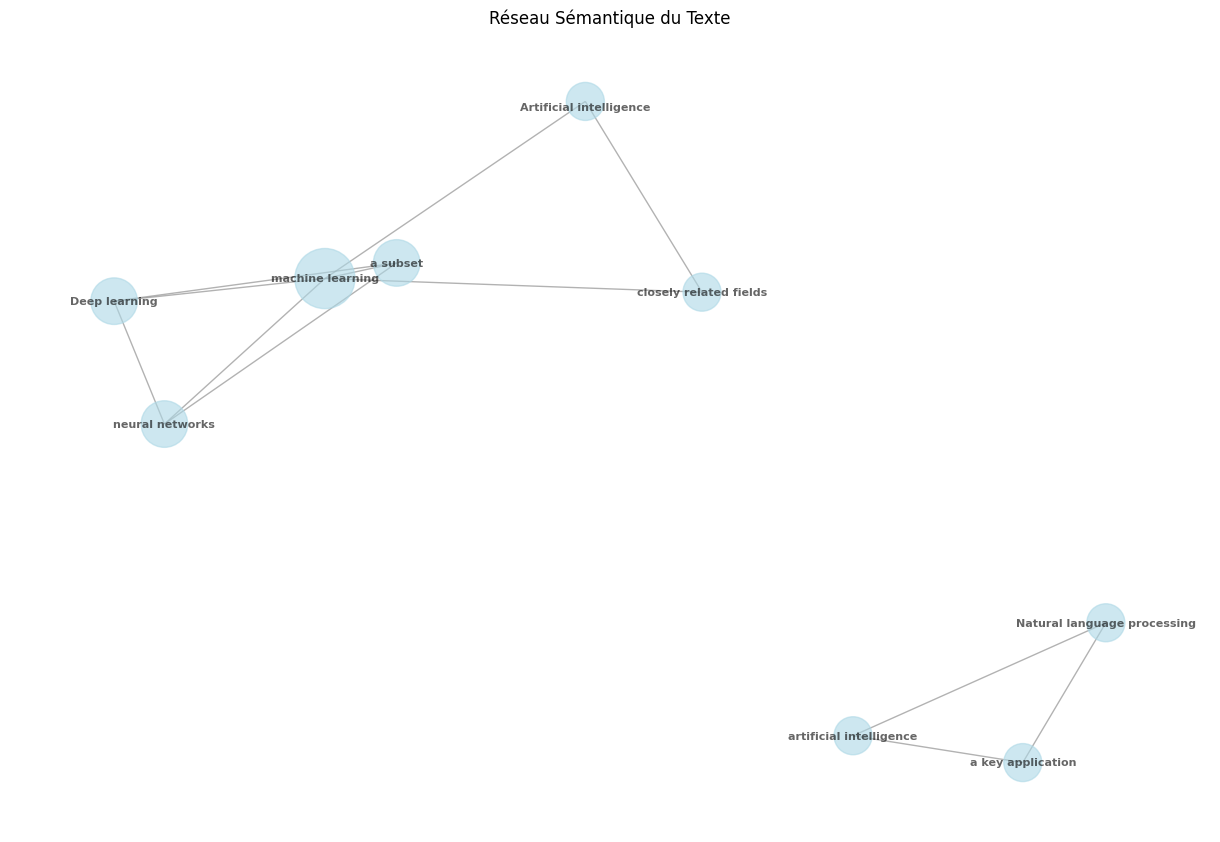

In [100]:
# Visualisation du réseau sémantique
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)

# Taille des nœuds basée sur leur centralité
node_sizes = [v * 3000 for v in degree_centrality.values()]

# Dessin du graphe
nx.draw(G, pos,
        node_color='lightblue',
        node_size=node_sizes,
        edge_color='gray',
        alpha=0.6,
        with_labels=True,
        font_size=8,
        font_weight='bold')

plt.title("Réseau Sémantique du Texte")
plt.axis('off')
plt.tight_layout()
plt.show()

<h2 style=" color:#428d8e;">2
ème Partie : Exploitation avancée du réseau</h2>  

1. Utiliser un corpus plus large pour voir comment le réseau évolue.

In [101]:
# Charger un modèle de langue
nlp = spacy.load('en_core_web_sm')

# Appliquer le modèle à un texte plus long (ex. un article Wikipedia)
text = """
Albert Einstein is known for his theory of relativity, which transformed the understanding of space and time. Albert Einstein worked at prestigious institutions, including the University of Berlin and the Institute for Advanced Study in Princeton, New Jersey. He received the Nobel Prize in Physics for his work on the photoelectric effect. His contributions have greatly influenced the fields of physics, mathematics, and philosophy.
"""
# Traitement du texte
doc = nlp(text)

# Extraire les entités nommées
entities = [ent.text for ent in doc.ents]

# Créer un réseau de relations entre les entités
relations = [(ent1, ent2) for ent1 in entities for ent2 in entities if ent1 != ent2]

print("Entités extraites :",entities)
print("Relations extraites :",relations)


Entités extraites : ['Albert Einstein', 'Albert Einstein', 'the University of Berlin', 'the Institute for Advanced Study', 'Princeton', 'New Jersey', 'the Nobel Prize in Physics']
Relations extraites : [('Albert Einstein', 'the University of Berlin'), ('Albert Einstein', 'the Institute for Advanced Study'), ('Albert Einstein', 'Princeton'), ('Albert Einstein', 'New Jersey'), ('Albert Einstein', 'the Nobel Prize in Physics'), ('Albert Einstein', 'the University of Berlin'), ('Albert Einstein', 'the Institute for Advanced Study'), ('Albert Einstein', 'Princeton'), ('Albert Einstein', 'New Jersey'), ('Albert Einstein', 'the Nobel Prize in Physics'), ('the University of Berlin', 'Albert Einstein'), ('the University of Berlin', 'Albert Einstein'), ('the University of Berlin', 'the Institute for Advanced Study'), ('the University of Berlin', 'Princeton'), ('the University of Berlin', 'New Jersey'), ('the University of Berlin', 'the Nobel Prize in Physics'), ('the Institute for Advanced Study

2. Explorer des méthodes avancées de détection de relations, telles que les dépendances
syntaxiques.

In [102]:
for token in doc:
    # Identifier les relations sujet-verbe-objet
    if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
        subj = token.text
        verb = token.head.text
        # Vérifier s'il y a un objet associé
        for child in token.head.children:
            if child.dep_ == "dobj":
                obj = child.text
                relations.append((subj, verb, obj))
    
    # Identifier les relations attributives
    if token.dep_ == "attr" and token.head.pos_ == "VERB":
        subject = [child.text for child in token.head.lefts if child.dep_ == "nsubj"]
        if subject:
            relations.append((subject[0], token.head.text, token.text))
    
    # Capturer les adjectifs pour les descriptions
    if token.dep_ == "amod":
        relations.append((token.head.text, "has_property", token.text))

# Afficher les relations extraites
print("Relations extraites :",relations)


Relations extraites : [('Albert Einstein', 'the University of Berlin'), ('Albert Einstein', 'the Institute for Advanced Study'), ('Albert Einstein', 'Princeton'), ('Albert Einstein', 'New Jersey'), ('Albert Einstein', 'the Nobel Prize in Physics'), ('Albert Einstein', 'the University of Berlin'), ('Albert Einstein', 'the Institute for Advanced Study'), ('Albert Einstein', 'Princeton'), ('Albert Einstein', 'New Jersey'), ('Albert Einstein', 'the Nobel Prize in Physics'), ('the University of Berlin', 'Albert Einstein'), ('the University of Berlin', 'Albert Einstein'), ('the University of Berlin', 'the Institute for Advanced Study'), ('the University of Berlin', 'Princeton'), ('the University of Berlin', 'New Jersey'), ('the University of Berlin', 'the Nobel Prize in Physics'), ('the Institute for Advanced Study', 'Albert Einstein'), ('the Institute for Advanced Study', 'Albert Einstein'), ('the Institute for Advanced Study', 'the University of Berlin'), ('the Institute for Advanced Study

3. Appliquer une mesure de similarité pour connecter les concepts liés sémantiquement mais non explicitement co-mentionnés.

In [103]:
# Extraire les entités nommées
entities = list(set([ent.text for ent in doc.ents]))

# Calculer les similarités entre toutes les paires d'entités
similarity_threshold = 0.7  # Seuil de similarité
similarity_relations = []

for ent1, ent2 in combinations(entities, 2):
    ent1_nlp = nlp(ent1)
    ent2_nlp = nlp(ent2)
    
    # Calculer la similarité cosinus entre les vecteurs des entités
    similarity = ent1_nlp.similarity(ent2_nlp)
    
    # Vérifier si la similarité dépasse le seuil
    if similarity >= similarity_threshold:
        similarity_relations.append((ent1, "similar_to", ent2, similarity))
# Filtrer les relations similaires pour éviter les doublons
filtered_relations = []
seen_pairs = set()

for src, rel, tgt, weight in similarity_relations:
    if (src, tgt) not in seen_pairs and (tgt, src) not in seen_pairs:
        filtered_relations.append((src, rel, tgt, weight))  # Garder également le poids (similarité)
        seen_pairs.add((src, tgt))
        # Afficher la similarité calculée
        print(f"{src} - {rel} -> {tgt} (similarité: {weight:.2f})")

        # Préparer les éléments pour le graphique (nœuds et arêtes)
nodes = [{"data": {"id": concept, "label": concept}} for concept in entities]

# Créer les arêtes avec les relations filtrées, sans modification de poids
edges = [{"data": {"source": src, "target": tgt}} for src, _, tgt, _ in filtered_relations]


C:\Users\SALMA\AppData\Local\Temp\ipykernel_12020\1905279539.py:13: UserWarning:

[W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.



the Nobel Prize in Physics - similar_to -> the Institute for Advanced Study (similarité: 0.84)
Albert Einstein - similar_to -> New Jersey (similarité: 0.77)
the University of Berlin - similar_to -> the Institute for Advanced Study (similarité: 0.72)


4. Créer une interface graphique pour naviguer dans le réseau sémantique et visualiser les relations entre les concepts

In [105]:
# Importer les bibliothèques nécessaires
import dash
from dash import html
import dash_cytoscape as cyto

# Créer l'application Dash
app = dash.Dash(__name__)  # Remarquez __name__ au lieu de _name_

# Définir la mise en page de l'application
app.layout = html.Div([
    cyto.Cytoscape(
        id='cytoscape-layout',
        elements=nodes + edges,  # Assurez-vous que nodes et edges sont définis
        layout={'name': 'circle'},  # Disposition simple en cercle
        style={'width': '100%', 'height': '600px'},
        stylesheet=[
            {'selector': 'node', 
             'style': {'content': 'data(label)', 'background-color': '#0074D9', 'color': 'black', 'text-valign': 'center', 'text-halign': 'center'}},  # Style des nœuds
            {'selector': 'edge', 
             'style': {'line-color': '#7FDBFF', 'width': 2}}  # Style des arêtes
        ]
    )
])

# Lancer l'application
if __name__ == '__main__':  # Remarquez la correction ici : __name__ au lieu de _name_
    app.run_server(debug=True)


# <div style=" color:#5072A7; padding: 10px; font-size: 24px; font-weight: bold;  text-align: center;">✦ FIN ✦ </div>